# Classification Day - 4
##Naive Bayes Classifier

import data set

perform basic eda, look for paterns

check for missing values and impute as is basis

apply scaling

convert the data into ohe and label encoder

split the data into train and test 

apply all the models and check the scores

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score,accuracy_score,confusion_matrix,recall_score

In [2]:
income=pd.read_csv("Income.csv")

In [3]:
income.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [5]:
income.shape

(32561, 12)

In [25]:
income.isnull().sum()

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [10]:
income.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [12]:
income.Workclass.fillna(value="Private", inplace = True )

In [11]:
income.Occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
income[income.Workclass=="Private"]["Occupation"].value_counts()

Craft-repair         3195
Sales                2942
Adm-clerical         2833
Other-service        2740
Exec-managerial      2691
Prof-specialty       2313
Machine-op-inspct    1913
Handlers-cleaners    1273
Transport-moving     1266
Tech-support          736
Farming-fishing       455
Protective-serv       190
Priv-house-serv       149
Name: Occupation, dtype: int64

In [24]:
income.Occupation.fillna(value="Prof-specialty", inplace=True)

In [16]:
income["Native.Country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [18]:
income[income["Native.Country"] == "United-States"]["Income.Group"].value_counts()

<=50K    21999
>50K      7171
Name: Income.Group, dtype: int64

In [21]:
income[income["Native.Country"].isnull()]["Income.Group"].value_counts()

<=50K    437
>50K     146
Name: Income.Group, dtype: int64

In [23]:
income["Native.Country"].fillna(value="United-States",inplace=True)

In [26]:
income["Hours.Per.Week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: Hours.Per.Week, Length: 94, dtype: int64

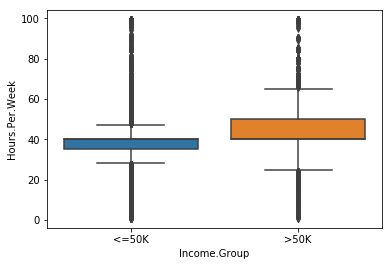

In [56]:
sns.boxplot(x="Income.Group" , y = "Hours.Per.Week" , data = income)

In [58]:
income.Age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

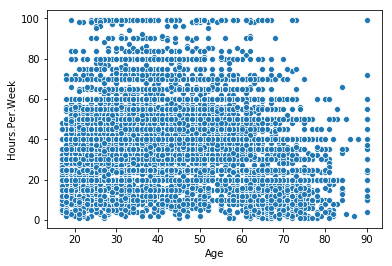

In [59]:
sns.scatterplot(x="Age" , y = "Hours.Per.Week" , data = income)

In [30]:
ohe=pd.get_dummies(income.drop(["ID","Income.Group"] , axis = 1 ))

In [60]:
ohe.shape

(32561, 101)

In [32]:
lb = LabelEncoder()

In [33]:
y = pd.DataFrame(lb.fit_transform(income["Income.Group"]))

In [35]:
sc=StandardScaler()

In [37]:
x = pd.DataFrame(sc.fit_transform(ohe))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30,random_state=123)

In [39]:
lg=LogisticRegression()

In [40]:
model_lg=lg.fit(xtrain,ytrain).predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
accuracy_score(ytest,model_lg)

0.8342716757088751

In [42]:
cohen_kappa_score(ytest,model_lg)

0.5083522703269818

In [43]:
knn = KNeighborsClassifier()

In [45]:
model_kn=knn.fit(xtrain,ytrain).predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [46]:
accuracy_score(ytest,model_kn)

0.8159484082301157

In [47]:
cohen_kappa_score(ytest,model_kn)

0.4812584660749504

In [48]:
nb= GaussianNB()

In [49]:
model_nb=nb.fit(xtrain,ytrain).predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
accuracy_score(ytest,model_nb)

0.4473334015764152

In [51]:
cohen_kappa_score(ytest,model_nb)

0.13804322159269855

In [52]:
dt=DecisionTreeClassifier()

In [53]:
model_dt=dt.fit(xtrain,ytrain).predict(xtest)

In [54]:
accuracy_score(ytest,model_dt)

0.7879005015866517

In [55]:
cohen_kappa_score(ytest,model_dt)

0.40522089085071766